# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [88]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [35]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'glocose', 'pres', 'skin_thick', 'insulin', 'bmi', 'Dia_pedi', 'age', 'class_output']
pima_id_df = pd.read_csv("pima-indians-diabetes_new.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [36]:
pima_id_df.head(10)


,preg,glocose,pres,skin_thick,insulin,bmi,Dia_pedi,age,class_output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [50]:
print("shape of dataset",pima_id_df.shape)
print("data type of columns", pima_id_df.dtypes)
#pima_id_df["class_output"].value_counts()

shape of dataset (768, 9)
data type of columns preg              int64
glocose           int64
pres              int64
skin_thick        int64
insulin         float64
bmi             float64
Dia_pedi        float64
age               int64
class_output      int64
dtype: object


0    500
1    268
Name: class_output, dtype: int64

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [38]:
#print(pima_id_df.info())
def replace_zero_median(X,column_name):
    X[column_name]=X[column_name].replace(0,X[column_name].median())
    
replace_zero_median(pima_id_df,"glocose")
replace_zero_median(pima_id_df,"pres")
replace_zero_median(pima_id_df,"skin_thick")
replace_zero_median(pima_id_df,"insulin")
pima_id_df.head()    
#median_pima_id_df = pima_id_df["glocose","pres","skin_thick","insulin","bmi"].median(skipna=True)
#median_pima_id_df

,preg,glocose,pres,skin_thick,insulin,bmi,Dia_pedi,age,class_output
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [20]:
print(pima_id_df.describe().T)

            count        mean         std     min       25%       50%  \
preg        768.0    3.845052    3.369578   0.000   1.00000    3.0000   
glocose     768.0  120.894531   31.972618   0.000  99.00000  117.0000   
pres        768.0   69.105469   19.355807   0.000  62.00000   72.0000   
skin_thick  768.0   20.536458   15.952218   0.000   0.00000   23.0000   
insulin     768.0   79.799479  115.244002   0.000   0.00000   30.5000   
bmi         768.0   31.992578    7.884160   0.000  27.30000   32.0000   
Dia_pedi    768.0    0.471876    0.331329   0.078   0.24375    0.3725   
age         768.0   33.240885   11.760232  21.000  24.00000   29.0000   
class_out   768.0    0.348958    0.476951   0.000   0.00000    0.0000   

                  75%     max  
preg          6.00000   17.00  
glocose     140.25000  199.00  
pres         80.00000  122.00  
skin_thick   32.00000   99.00  
insulin     127.25000  846.00  
bmi          36.60000   67.10  
Dia_pedi      0.62625    2.42  
age          

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

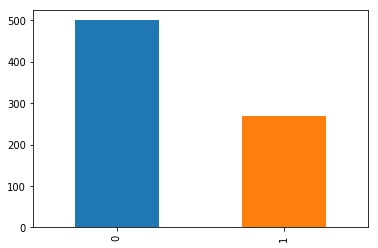

In [25]:
#class is a categorical variable  so used bar plot
pima_id_df['class_out'].value_counts().plot.bar()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

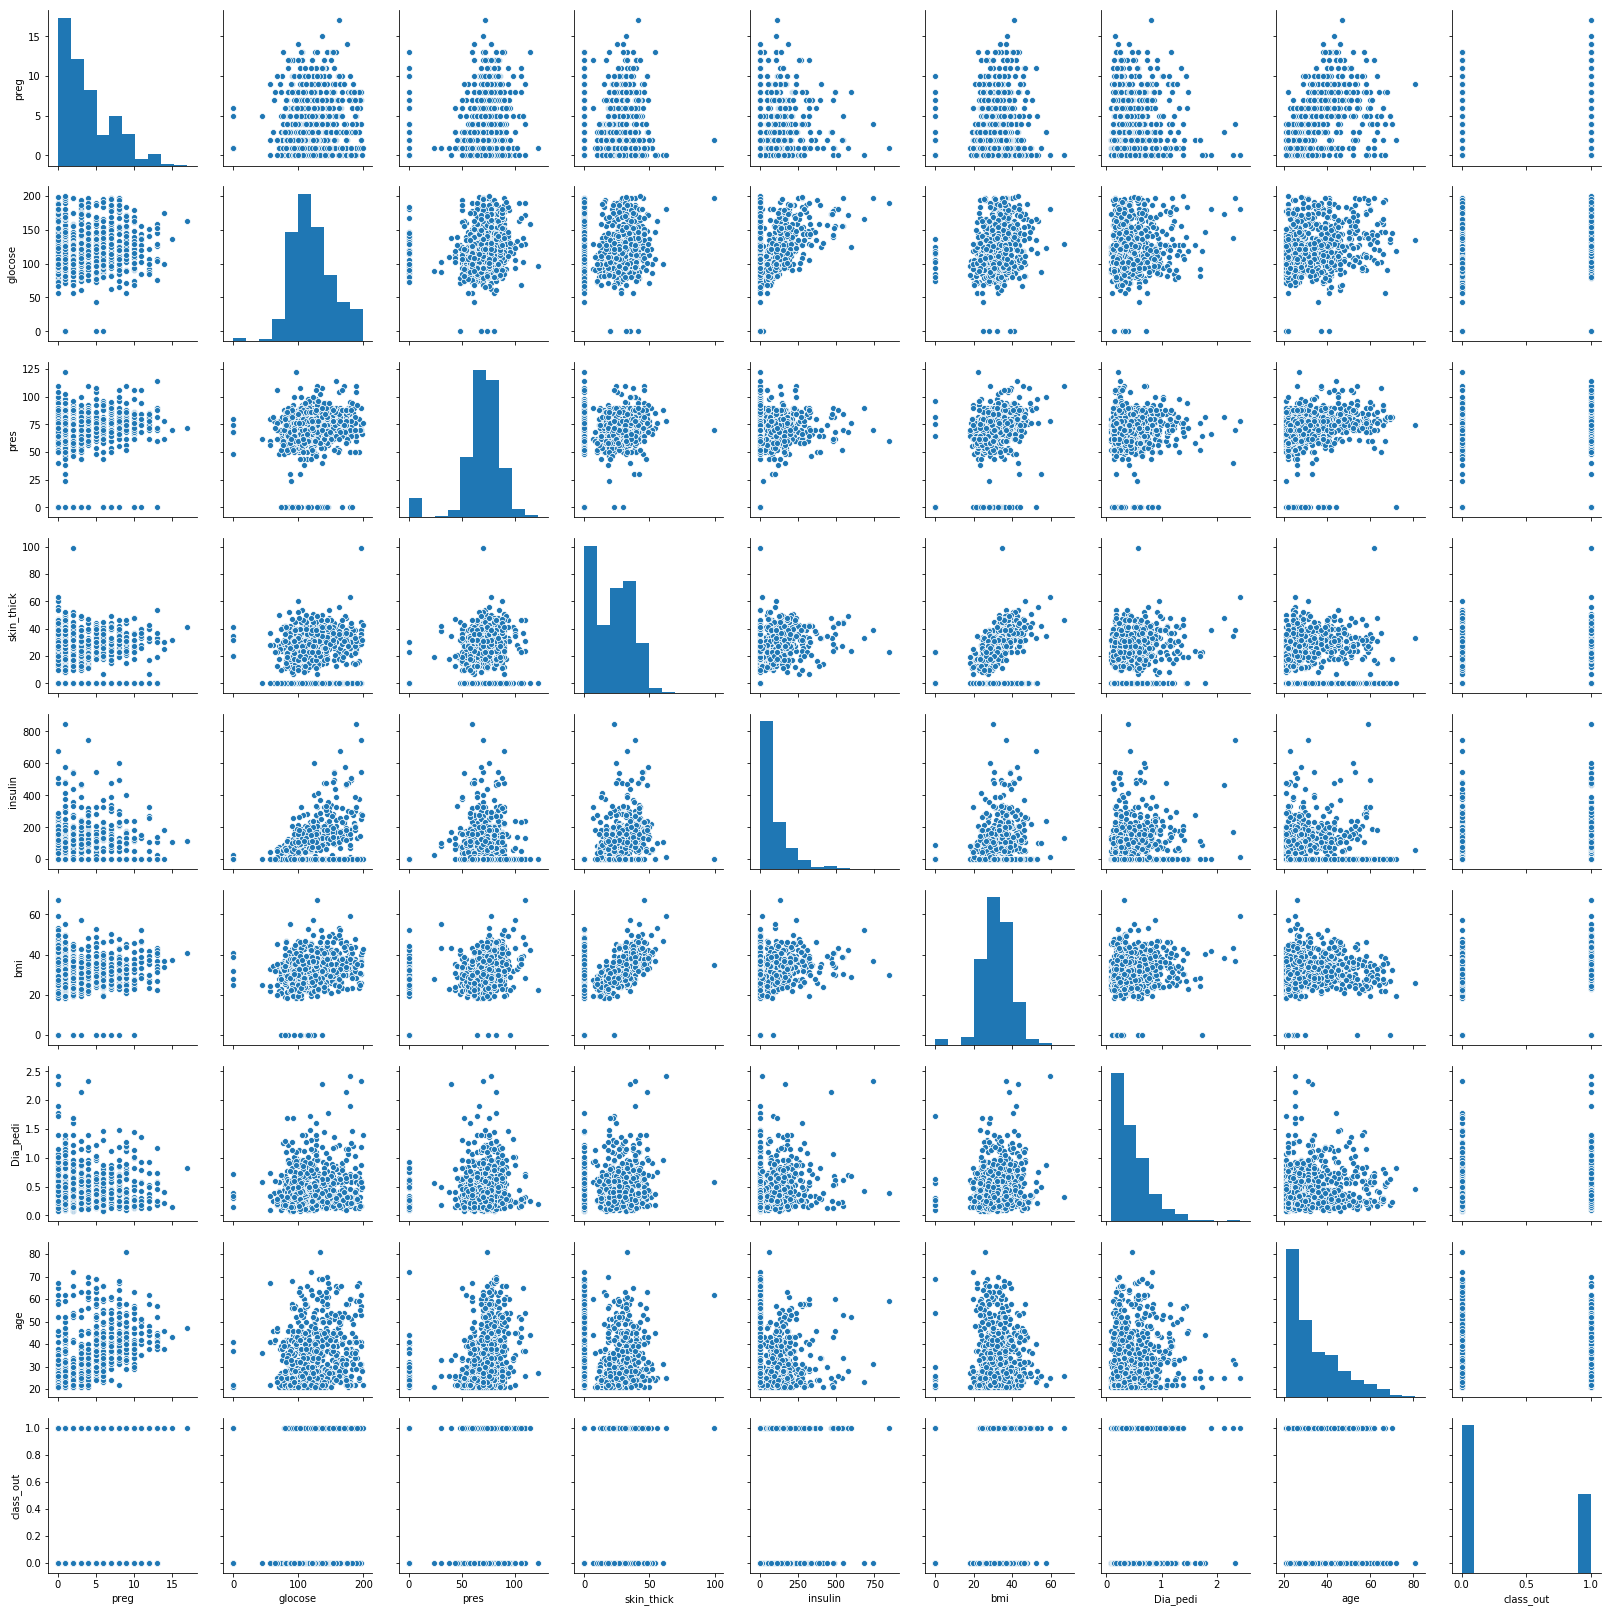

In [26]:
# Pairplot using sns
sns.pairplot(pima_id_df)

In [39]:
pima_id_df.corr()

,preg,glocose,pres,skin_thick,insulin,bmi,Dia_pedi,age,class_output
preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.017683,-0.033523,0.544341,0.221898
glocose,0.128213,1.000000,0.218937,0.172143,0.357573,0.235035,0.137327,0.266909,0.492782
pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.234336,-0.002378,0.324915,0.165723
skin_thick,0.032568,0.172143,0.147809,1.000000,0.238188,0.504307,0.142977,0.054514,0.189065
insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.197284,0.178029,-0.015413,0.148457
bmi,0.017683,0.235035,0.234336,0.504307,0.197284,1.000000,0.140647,0.036242,0.292695
Dia_pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.036242,0.033561,1.000000,0.238356
class_output,0.221898,0.492782,0.165723,0.189065,0.148457,0.292695,0.173844,0.238356,1.000000


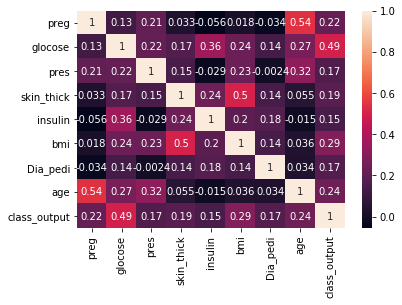

In [40]:
sns.heatmap(pima_id_df.corr(), annot=True)

Observations:
From pairplot data for all the attributes are skewed, especially for the variable "test"
From pairplot attributes which look normally distributed (plas, pres, skin, and mass).
The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. We can observe that the correlation between Pregnency and Age is highest i.e. 0.54 and then between class/output and glucose i.e. 0.49.
Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. 

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [56]:
X = pima_id_df.drop("class_output", axis=1)
Y = pima_id_df["class_output"]
test_size = 0.30 # taking 70:30 training and test set
seed = 4  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
Xtrain=np.array(X_train)
Ytrain=np.array(Y_train)

Xtest=np.array(X_test)
Ytest=np.array(Y_test)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [68]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV

mymodel=DecisionTreeClassifier()
#model1.fit(X_train,Y_train)

parameter={'max_depth':np.arange(1,10),'criterion' : ['entropy']}
#we are doing here 3 fold validatin
GS=GridSearchCV(mymodel,parameter,cv=3)
GS.fit(Xtrain,Ytrain)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
#GS.score(X_train, Y_train)

In [70]:
#GS.score(X_test,Y_test)

In [71]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [80]:
mymodel=DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=0)
mymodel.fit(Xtrain,Ytrain)


Training score 0.7895716945996276
Test score 0.7445887445887446


In [78]:
Y_predict=mymodel.predict(Xtest)

Test score 0.7445887445887446


# Q10 Print the accuracy of the model & print the confusion matrix 

In [81]:
metrics.confusion_matrix(Y_test,Y_predict)


array([[107,  45],
       [ 14,  65]], dtype=int64)

Print the feature importance of the decision model - Optional

In [86]:
print ("Training score",mymodel.score(X_train, Y_train))
print ("Test score",mymodel.score(X_test,Y_test))
print("accuracy",metrics.accuracy_score(Ytest,Y_predict))

Training score 0.7895716945996276
Test score 0.7445887445887446
accuracy 0.7445887445887446


In [87]:
print(metrics.classification_report(Ytest,Y_predict))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       152
           1       0.59      0.82      0.69        79

   micro avg       0.74      0.74      0.74       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.74      0.75       231



# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [113]:
my_Rf_model = RandomForestClassifier(n_estimators=55,criterion='entropy',random_state=0 )
my_Rf_model.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [114]:
Y_predict=my_Rf_model.predict(Xtest)
print("accuracy",metrics.accuracy_score(Ytest,Y_predict))

accuracy 0.8095238095238095


In [115]:
print(metrics.classification_report(Ytest,Y_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       152
           1       0.71      0.75      0.73        79

   micro avg       0.81      0.81      0.81       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [119]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [155]:
#boosted decision tree
boosted_dt=AdaBoostClassifier(base_estimator=mymodel,n_estimators=45,random_state=1)
boosted_dt.fit(Xtrain,Ytrain)
Y_bdt_predict=boosted_dt.predict(Xtest)
print("accuracy",metrics.accuracy_score(Ytest,Y_bdt_predict))
print(metrics.classification_report(Ytest,Y_bdt_predict))

accuracy 0.7142857142857143
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       152
           1       0.57      0.66      0.61        79

   micro avg       0.71      0.71      0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.72       231



In [156]:
#boosted random forest tree
boosted_rf=AdaBoostClassifier(base_estimator=my_Rf_model,n_estimators=60,random_state=1)
boosted_rf.fit(Xtrain,Ytrain)
Y_brf_predict=boosted_rf.predict(Xtest)
print("accuracy",metrics.accuracy_score(Ytest,Y_brf_predict))
print(metrics.classification_report(Ytest,Y_brf_predict))

accuracy 0.7619047619047619
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       152
           1       0.65      0.65      0.65        79

   micro avg       0.76      0.76      0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [166]:
bagged_dt=BaggingClassifier(base_estimator=mymodel,n_estimators=45,random_state=2)
bagged_dt.fit(Xtrain,Ytrain)
Y_bgdt_predict=bagged_dt.predict(Xtest)
print("accuracy",metrics.accuracy_score(Ytest,Y_bgdt_predict))
print(metrics.classification_report(Ytest,Y_bdt_predict))

accuracy 0.7965367965367965
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       152
           1       0.57      0.66      0.61        79

   micro avg       0.71      0.71      0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.72       231



# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [167]:
gb_model=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [169]:
gb_model.fit(Xtrain,Ytrain)
Y_gb_predict=gb_model.predict(Xtest)
print("accuracy",metrics.accuracy_score(Ytest,Y_gb_predict))
print(metrics.classification_report(Ytest,Y_gb_predict))

accuracy 0.7922077922077922
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       152
           1       0.69      0.71      0.70        79

   micro avg       0.79      0.79      0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [ ]:
VotingClassifier(estimators = [('Boosted_LR',boost_LR),('RF', base_rf), ('Boosted_DT', boost_dt)],voting='soft')